<a href="https://colab.research.google.com/github/phuonggtrann/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS16_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# import statements
import pandas as pd
import numpy as np 
from scipy import stats
import math
import matplotlib.pyplot as plt

In [2]:
# 1. Load and clean data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('house-votes-84.data', names=column_headers)

# modifying value
df = df.replace({"y": 1, "n": 0, "?": np.NaN})
df = df.dropna()

# splitting
rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

--2020-05-12 19:09:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.5’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-05-12 19:09:58 (286 KB/s) - ‘house-votes-84.data.5’ saved [18171/18171]



In [3]:
df.isnull().sum()

party                   0
handicapped-infants     0
water-project           0
budget                  0
physician-fee-freeze    0
el-salvador-aid         0
religious-groups        0
anti-satellite-ban      0
aid-to-contras          0
mx-missile              0
immigration             0
synfuels                0
education               0
right-to-sue            0
crime                   0
duty-free               0
south-africa            0
dtype: int64

In [0]:
def confidence_interval(data, confidence=0.95):
  x_bar = data.mean() # this is mean
  n = len(data)
  s = data.std()
  std_err = s / math.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)

In [5]:
confidence_interval(rep['aid-to-contras'])

(0.0800671512383129, 0.14814814814814814, 0.21622914505798338)

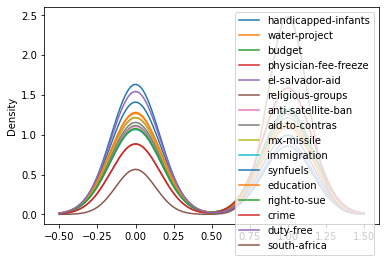

In [6]:
df.plot.density() # Bell curve plot for each issue 
plt.show()

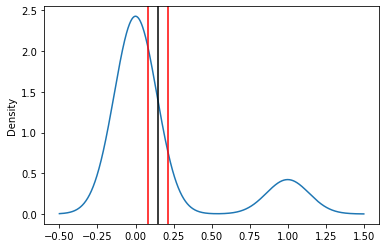

In [7]:
lower, mean, upper = confidence_interval(rep['aid-to-contras'])
rep['aid-to-contras'].plot.density() # Bell curve plot for each issue 
plt.axvline(x=lower, color='red')
plt.axvline(x=mean, color='black')
plt.axvline(x=upper, color='red')
plt.show()

In [8]:
''' Data Interpretation:
The confidence interval doesn't capture 95% of our data in our sample
5% of the sample would include the true value of the parameter estimated.
We are 95% confidence that the parameter's true mean fall within the range of the CI
'''

" Data Interpretation:\nThe confidence interval doesn't capture 95% of our data in our sample\n5% of the sample would include the true value of the parameter estimated.\nWe are 95% confidence that the parameter's true mean fall within the range of the CI\n"

In [9]:
# Chi square test by hand 
observed = pd.crosstab( df['aid-to-contras'],df['party'], margins=True)
observed

party,democrat,republican,All
aid-to-contras,,,
0.0,21,92,113
1.0,103,16,119
All,124,108,232


In [10]:
# grab the row sums from the crosstab
row_sums = observed.iloc[0:2, 2:].values.T[0]
row_sums

array([113, 119])

In [16]:
# Grab the col sums from the crosstab
col_sums = observed.iloc[-1:, 0:-1].values
col_sums = col_sums[0]
col_sums

array([124, 108])

In [17]:
# get total
total = observed .iloc[-1:, -1:].values
total = total[0][0]
total

232

In [18]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 2)
[[60.39655172 52.60344828]
 [63.60344828 55.39655172]]


In [19]:
observed_wo_margin = pd.crosstab( df['aid-to-contras'],df['party'])
chi2 = ((observed_wo_margin - expected)**2 / expected).sum().sum()
chi2

107.62409953355528

In [20]:
# Chi square test using scipy
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print(" chi2 statistic", chi2)
print("\n p-value", p_value)
print("\n degrees of freedom",dof)
print("\n expected frequencies table: \n", expected)

 chi2 statistic 107.62409953355528

 p-value 2.3366828428831607e-22

 degrees of freedom 4

 expected frequencies table: 
 [[ 60.39655172  52.60344828 113.        ]
 [ 63.60344828  55.39655172 119.        ]
 [124.         108.         232.        ]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [0]:
1) Null Hypothesis:

The two variables are independent

2) Alternative:

The two variables are dependent (associated)

3) Confidence Level: 95%

Our alpha will be 1 - 0.95= 0.05

Since p-value is almost 0, we are able to reject the null hypothesis that the 2 variables are independent. 
We are 95% confidence that the two variables (party and choice of vote) are dependent to each other

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)